## Statistics for Data Science Project Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

We observe the data by displaying the first 5 rows and then use panda's describe function to see the stats.

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Task 4: Generate Descriptive Statistics and Visualization

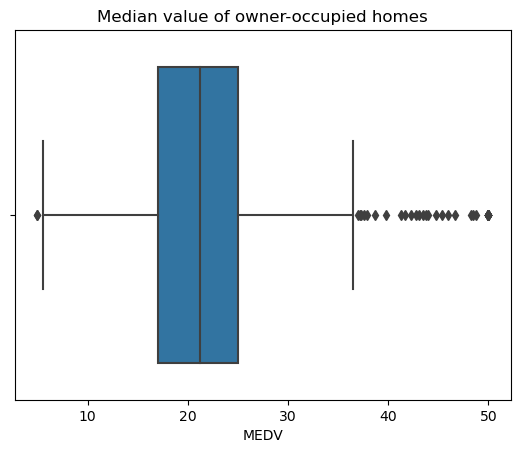

In [5]:
# Median value of owner-occupied homes boxplot

ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set(title = 'Median value of owner-occupied homes')
plt.show()

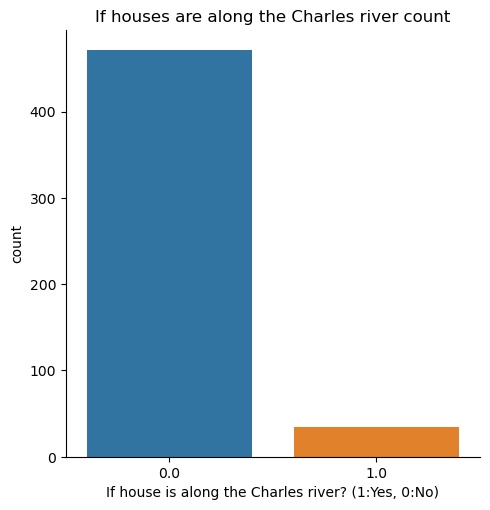

In [7]:
# bar-plot for Charles River Variable for median hose values

ax = sns.catplot(x = 'CHAS', kind='count', data=boston_df)
ax.set(title = 'If houses are along the Charles river count', xlabel='If house is along the Charles river? (1:Yes, 0:No)')
plt.show()

In [8]:
# Categorize the AGE into three categories

boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = 'low_age'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'mid_age'
boston_df.loc[(boston_df['AGE'] > 70),'age_group'] = 'high_age'

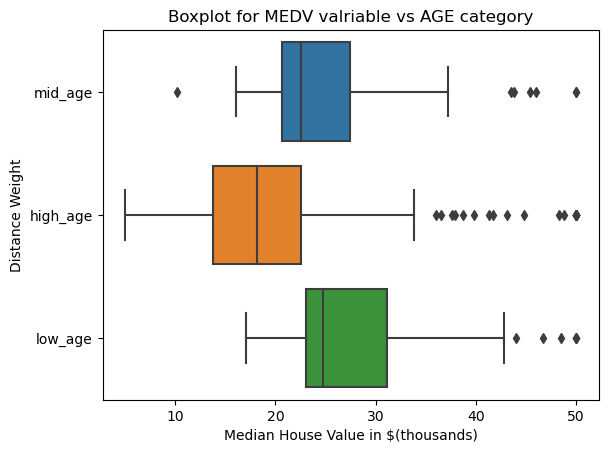

In [9]:
# Provide boxplot for MEDV variable vs AGE variable

ax = sns.boxplot(x = 'MEDV', y='age_group', data = boston_df)
ax.set(xlabel = 'Median House Value in $(thousands)', ylabel = 'Distance Weight', title='Boxplot for MEDV valriable vs AGE category')
plt.show()

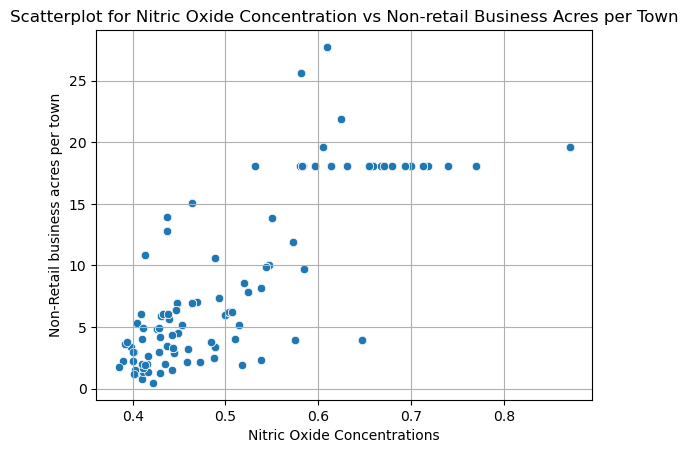

In [10]:
# Scatter plot to show the relationship between nitric oxide concentrations and the proportion of 
# non-retail business acres per town.

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.grid()
ax.set(xlabel='Nitric Oxide Concentrations', ylabel='Non-Retail business acres per town', 
       title= 'Scatterplot for Nitric Oxide Concentration vs Non-retail Business Acres per Town')
plt.show()

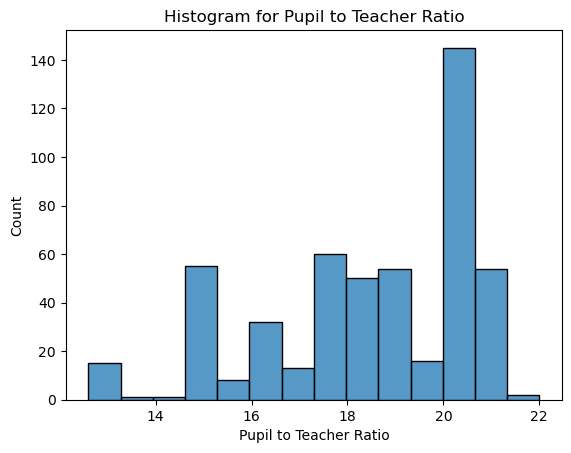

In [11]:
# Histogram for the pupil to teacher ratio

ax = sns.histplot(x='PTRATIO', data = boston_df)
ax.set(xlabel='Pupil to Teacher Ratio', title='Histogram for Pupil to Teacher Ratio')
plt.show()

### Task 5: Use the appropriate tests to answer the questions

### Question 1. Is there a signigicant difference in median home value of houses bounded by the Charles reiver or not?

First we use the boxplot to visualize the median home value of houses that are by the Charles river and the ones that are not.

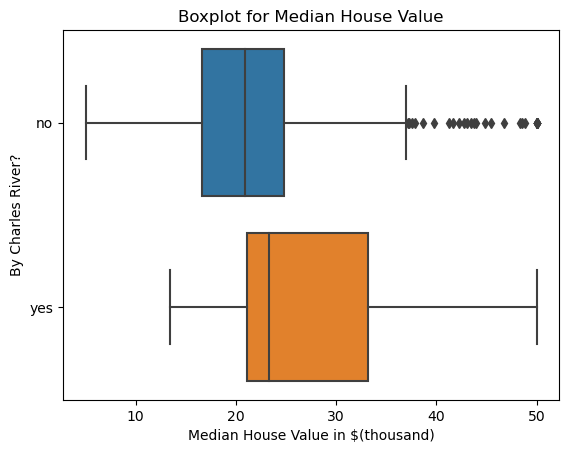

In [12]:
boston_df.loc[boston_df['CHAS'] == 1, 'CR_group']='yes'
boston_df.loc[boston_df['CHAS'] == 0, 'CR_group']='no'
ax = sns.boxplot(x = 'MEDV', y='CR_group', data = boston_df)
ax.set(xlabel = 'Median House Value in $(thousand)', ylabel = 'By Charles River?', title = 'Boxplot for Median House Value')
plt.show()

It looks like the median house values by Charles is more expensive. But we use the hypothesis testing to verify.

*H_0: There is no significant difference in median house values if they are by the Charles River.<br>
H_1: There is a difference in median house values if they are by the Charles River.*

at the $\alpha = 0.05$ significance level.

First, we will use Lavene test to find out if the variences of median house values that are by the Charles river differs from to the ones that are not by the Charles river.

In [13]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, than the cannot assume the equality of varience and use the t-test with different variances.

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion for Q1:** Since the p-value of the T-test is less than 0.05, we reject the null hypothesis. There is a significant evidence that median house values by the Charles river is different than the ones that are not by the Charles river.

### Question 2. Is there a difference in median values of houses for each proportion of owner occupied units built prior to 1940?

We can use scatterplot to visualize the relationship between the proportion of the houses build before 1940 and the median house values in thousands of dollars.

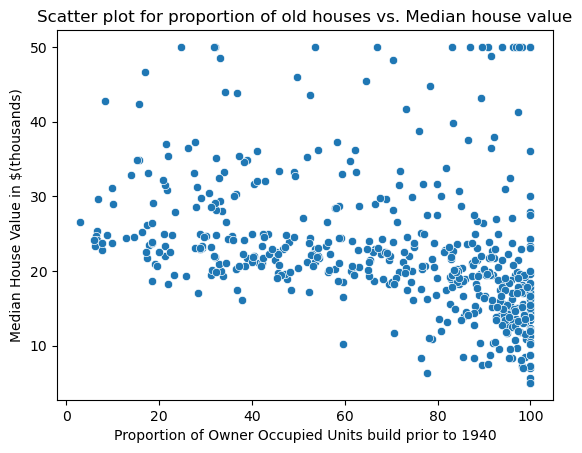

In [16]:
ax = sns.scatterplot(x='AGE', y = 'MEDV', data=boston_df)
ax.set(xlabel='Proportion of Owner Occupied Units build prior to 1940', ylabel='Median House Value in $(thousands)',
      title = 'Scatter plot for proportion of old houses vs. Median house value')
plt.show()

We can see that when the proportion of the houses build before 1940 increases, in general their median value decreases. But to test this hypthesis we will categorize the proportion of the houses build before 1940:
* low proportion if less than 35
* mid proportion is between 35 and 70
* high proportion if larger than 70 

and then use F-test for the hypotheis testing.

*H_0 : There is no difference in the median house values of these 3 groups<br>
H_1 : At least for one of the groups, the median house values are different than the others*

In [15]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = 'low_age'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'mid_age'
boston_df.loc[(boston_df['AGE'] > 70),'age_group'] = 'high_age'

In [16]:
# to see the new dataframe header
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,CR_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,mid_age,no
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,high_age,no
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,mid_age,no
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,mid_age,no
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,mid_age,no


Test for equality of variences of these groups

In [17]:
scipy.stats.levene(boston_df[boston_df['age_group']=='low_age']['MEDV'],
                   boston_df[boston_df['age_group']=='mid_age']['MEDV'],
                   boston_df[boston_df['age_group']=='high_age']['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05 the valience is considered equal. Now we run the one-way ANOVA on these groups

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='low_age']['MEDV'],
                                            boston_df[boston_df['age_group']=='mid_age']['MEDV'],
                                            boston_df[boston_df['age_group']=='high_age']['MEDV'])
print("F-statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


**Conclusion for Q2:** Since p-value is less than 0.05 we reject the null hypothesis. There is significant evidence that at least one of groups median house values differ.

### Question 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

To illustrate the data visually, first we use the scatterplot to find out if there is a correlation between nitric oxide concentration and non-retail business acres per town.

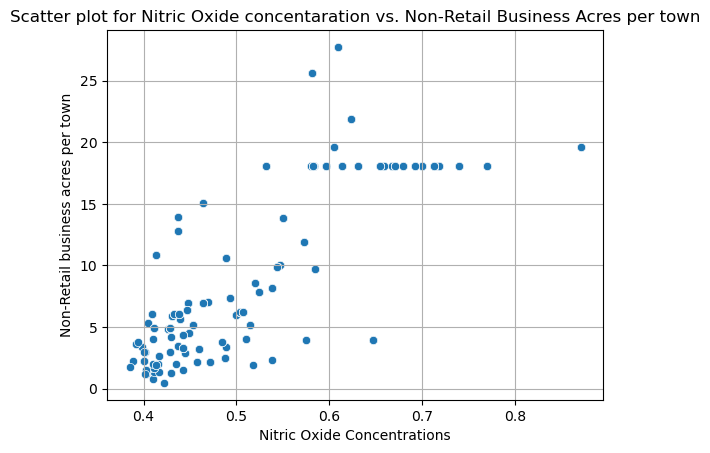

In [19]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.grid()
ax.set(xlabel='Nitric Oxide Concentrations', ylabel='Non-Retail business acres per town',
      title = 'Scatter plot for Nitric Oxide concentaration vs. Non-Retail Business Acres per town')
plt.show()

We see that there is a linear correlation between nitric oxide concentration and the non-retail business acres per town. 
To test our hypothesis, we setup the hyotheses as below:

*H_0 : There is no correlation between nitric oxide concentration and non-retail business acres per town.<br>
H_1 : There is a correlation between nitric oxide concentration and non-retail business acres per town.*

To test the hypothesis we use the pearson correlation method.<br>


In [20]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion for Q3:** Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is significant evidence that nitric oxide concentrations and non-retail business acres per town are correlated.

### Question 4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes?

First we visually demonstrate the weighted distance to five boston employment centers using boxplot. 

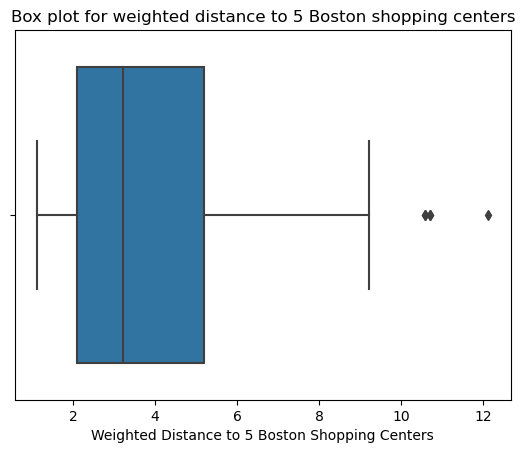

In [24]:
ax = sns.boxplot(x = 'DIS', data = boston_df)
ax.set(xlabel='Weighted Distance to 5 Boston Shopping Centers', title = 'Box plot for weighted distance to 5 Boston shopping centers')
plt.show()

We setup the hypotheses as such:

*H_0 : There is no impact of aditional weighted distance to the five Boston emplyment centers on the median value of owner occupied houses.<br>
H_1 : There is impact of additional weighted distance to the five Boston emplyment centers on the median value of owner occupied houses.*

**Regression with ANOVA** We apply regression with ANOVA analysis to find out the impact of the weighted distance to five Boston emplyment centers on the median value of owner occupied homes. 

In [26]:
X = boston_df['DIS']     # highted distance to employment centers
y = boston_df['MEDV']    # median value of owner-occupied houses

# add an intercept (bta_0) to model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# print out statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        23:00:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion for Q4** We reject the null hypothesis since the p-value is less than 0.05. There is a significant evidence that distance weight to five Boston employment centers impact the median value of owner occupied homes.